In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize

/tmp/ipykernel_2155045/1205417597.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


```
[INFO] START: 09_10_2024_19_29_11
[INFO] Input: MPOLICY ondemand
[INFO] Input: MQUERY query5
[INFO] Input: DVFS 0c00 0e00 1000 1200 1400 1600 1800 1a00
[INFO] Input: ITRS 2 100 200 300 400 500 600 700 800 900 1000
[INFO] Input: NITERS 0
[INFO] Input: FLINK_RATE 6000_300000 12000_300000 24000_300000
[INFO] Input: FLINK_RATE_TYPE static
[INFO] Input: BUFF -1
[INFO] Input: NCORES 16
[INFO] Input: IPWINDOW 10.10.1.3
[INFO] Input: MCFG 1;16;16
[INFO] Input: WINDOW_LENGTH 20
[INFO] Input: FLINK_CHECKPOINTING_ENABLED false
[INFO] Input: FLINK_CHECKPOINTING_INTERVAL 10000
[INFO] Input: FLINK_CHECKPOINTING_MODE exactly_once
[INFO] Input: FLINK_ROCKSDB_STATE_BACKEND_ENABLED true
```

In [3]:
df_comb = pd.read_csv("window16/windowlength20/combined.csv")
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)

In [9]:
def graph(rate, dfo, dfu, wlen=0, left=-0.1, right=1.1, metric='SourcenumRecordsOutPerSecond_percent'):
    plt.rcParams['figure.figsize'] = 25, 10
    plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

    fig, ax = plt.subplots()

    scatter_c1 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=500, c=dfu.itr, edgecolor="black", 
                            cmap='Blues', marker=MarkerStyle("o", fillstyle="right"), label="userspace")

    scatter_c2 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=500, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o", fillstyle="left"))

    ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=500,edgecolor="black", c='lime',
                           marker=MarkerStyle("o"), label="ondemand")

    # Add colorbars
    cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='vertical', label="ITR-delay (us)")
    cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='vertical', label="DVFS (Ghz)")

    ax.set_xlabel(metric)
    ax.set_ylabel('Power (W)')
    ax.set_xlim(left=left, right=right)
    #ax.set_ylim(bottom=35, top=110.0)

    ax.set_title(f"Query5: {dfu['nwindows'].iloc[0]} Windows, WindowLength {wlen} @ {rate}K RPS", size=22)
    plt.legend(fontsize=22)

    plt.tight_layout()

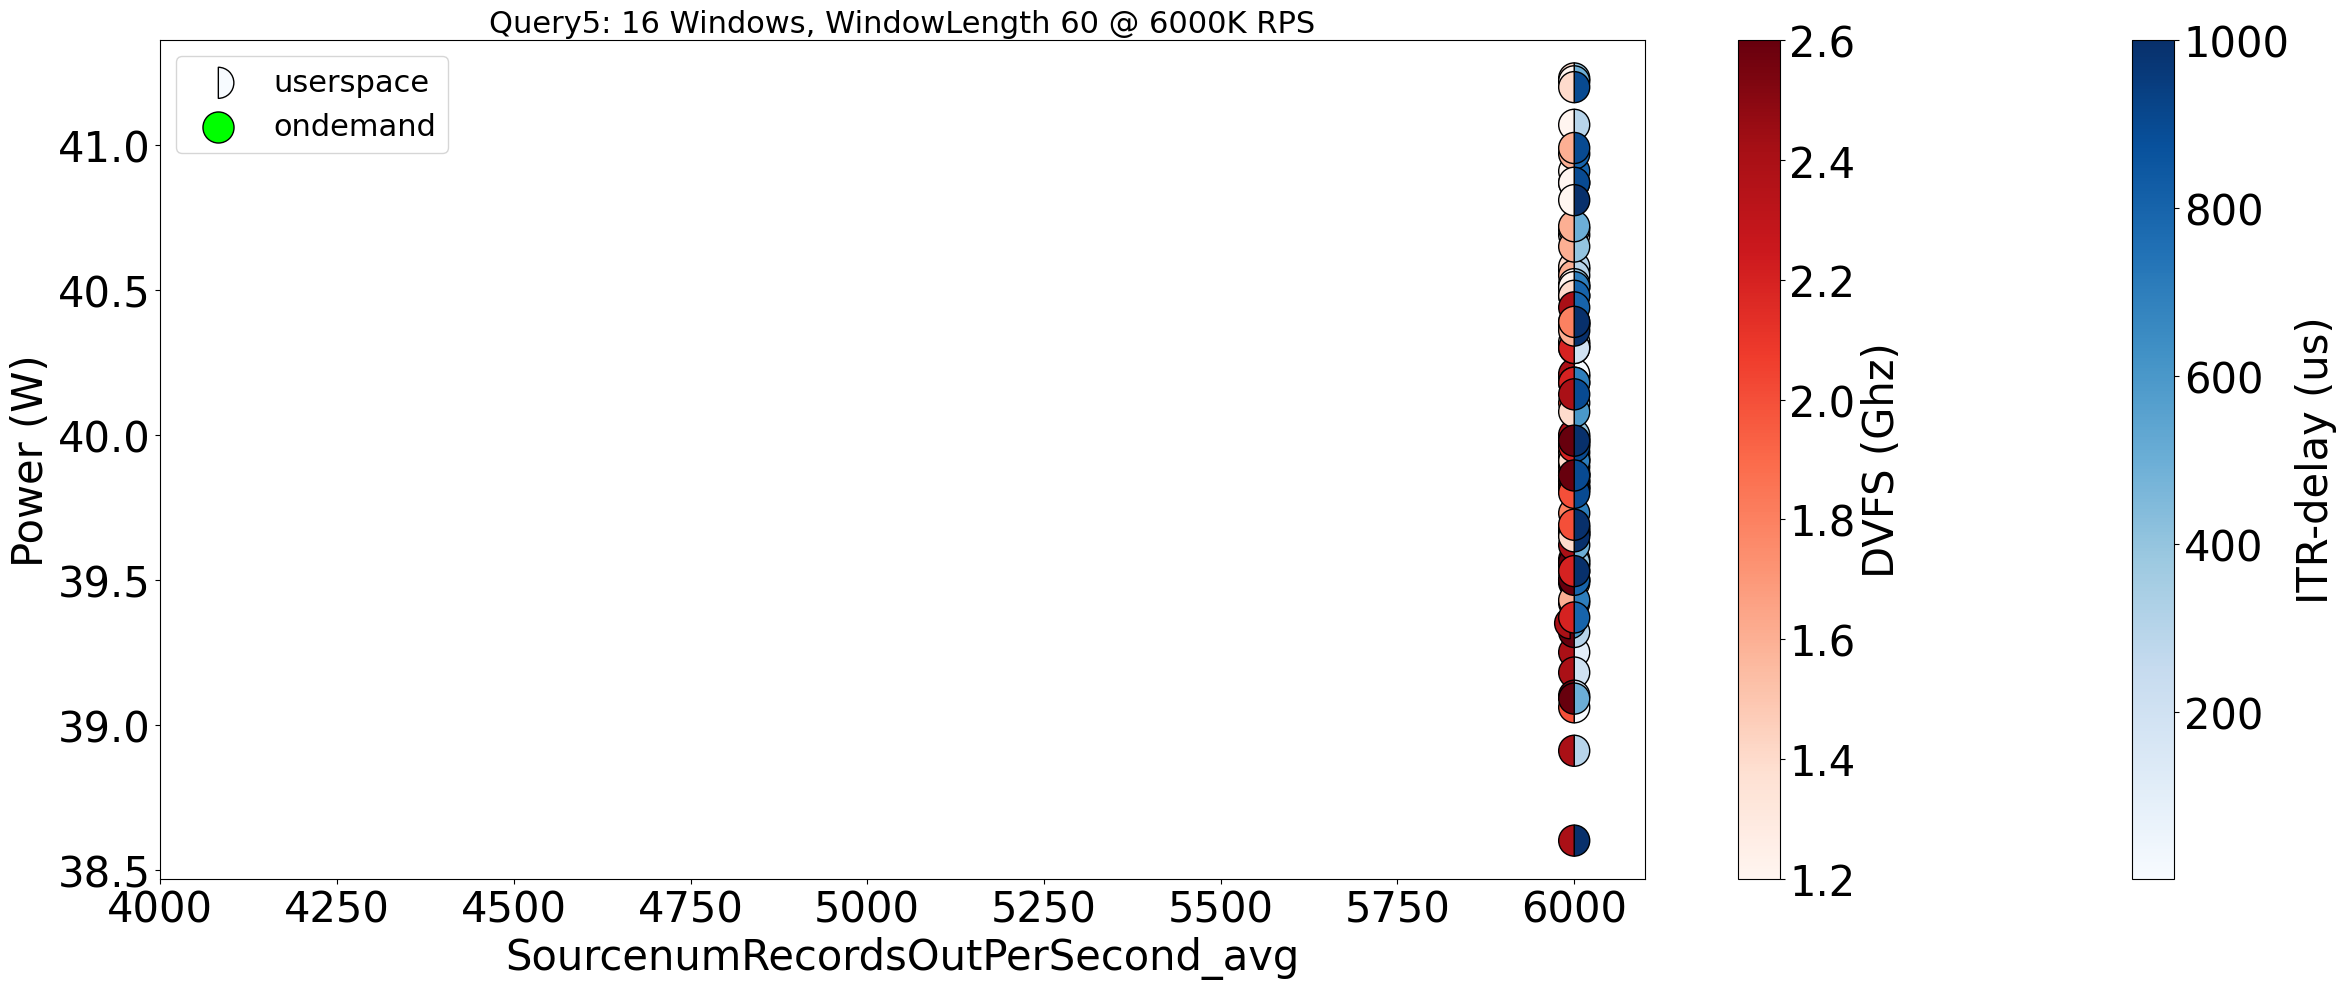

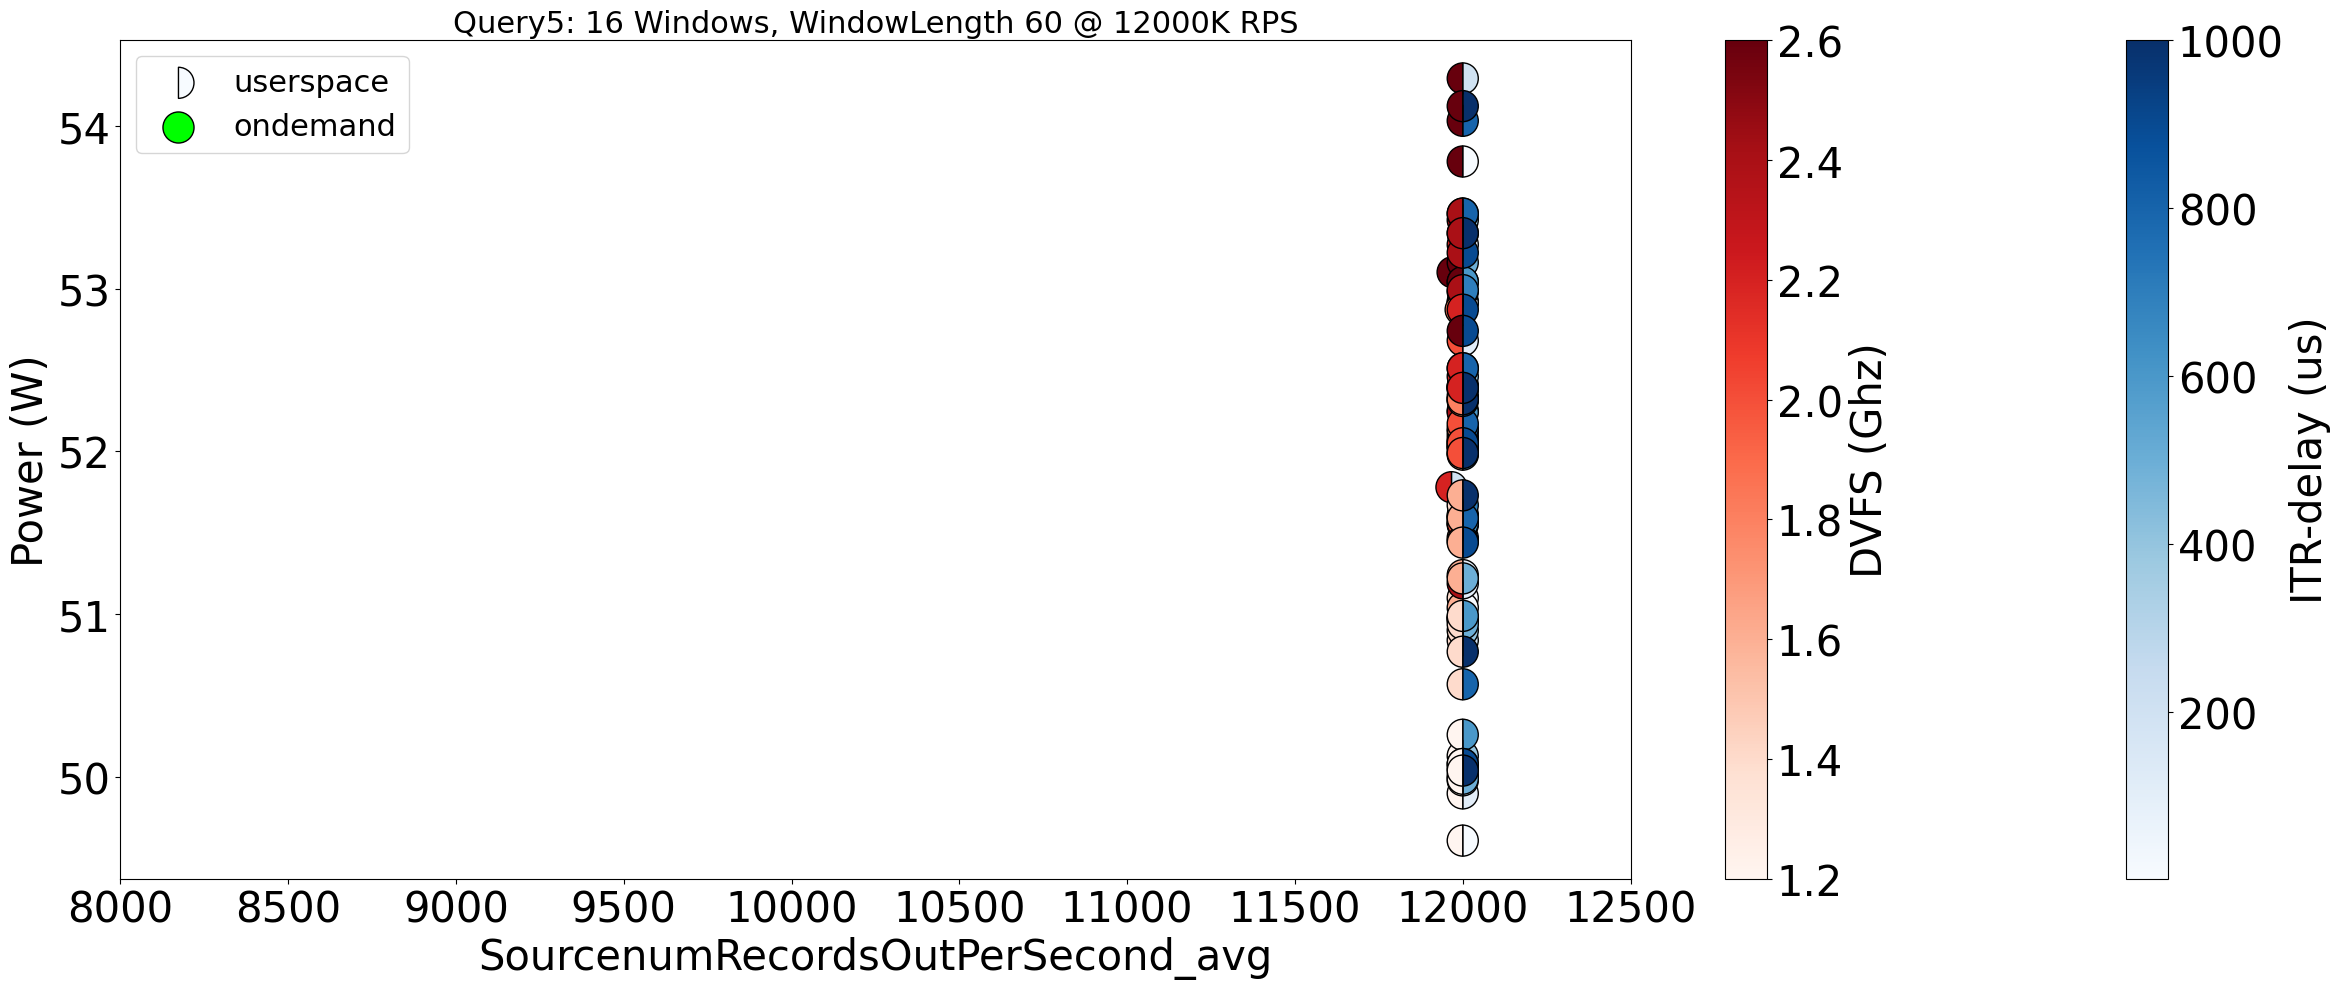

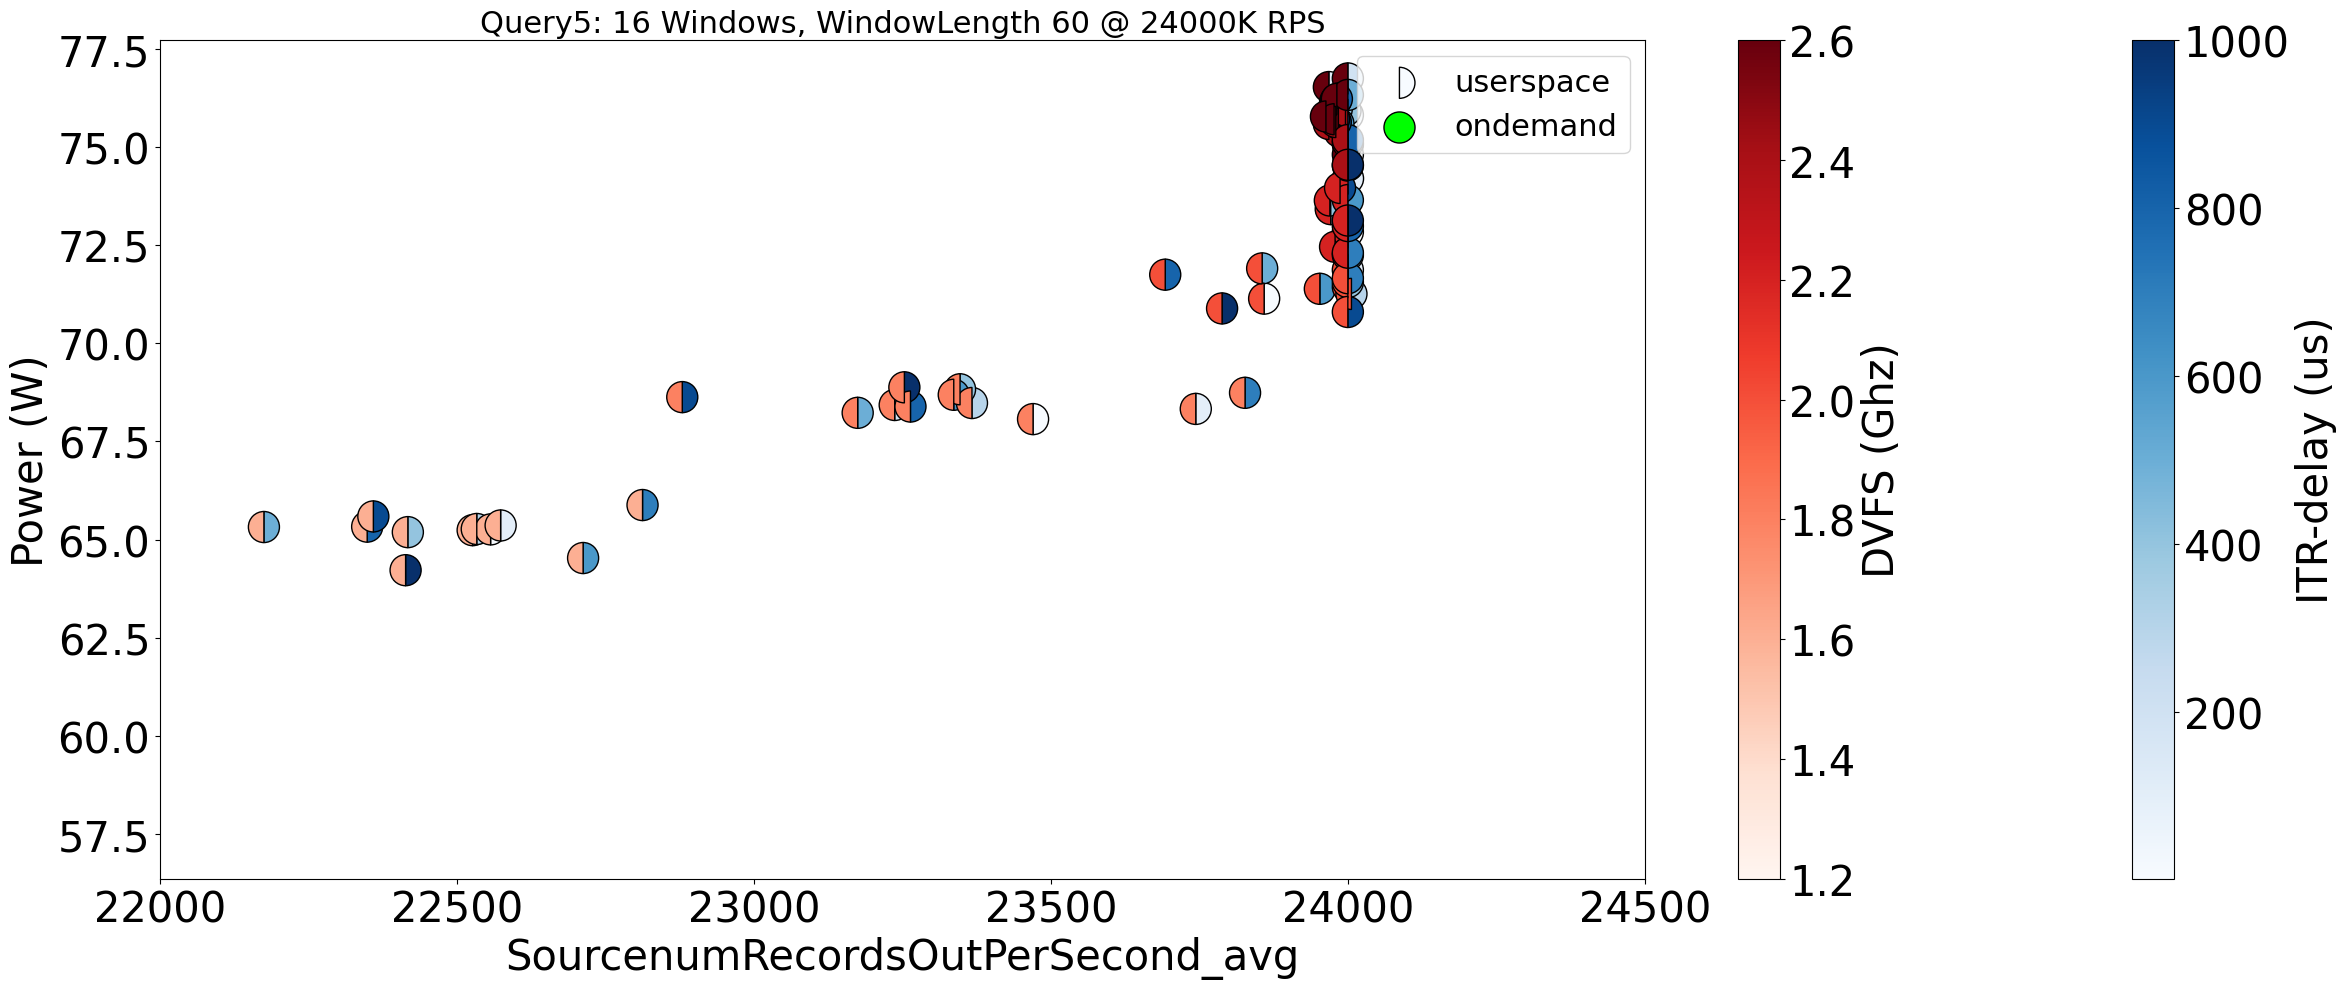

In [10]:
df100o = df_comb[(df_comb.rate == 6000) & (df_comb.policy == 'ondemand')]
df100u = df_comb[(df_comb.rate == 6000) & (df_comb.policy == 'userspace')]
graph(6000, df100o, df100u, 60, 4000, 6100, metric='SourcenumRecordsOutPerSecond_avg')

df200o = df_comb[(df_comb.rate == 12000) & (df_comb.policy == 'ondemand')]
df200u = df_comb[(df_comb.rate == 12000) & (df_comb.policy == 'userspace')]
graph(12000, df200o, df200u, 60, 8000, 12500,metric='SourcenumRecordsOutPerSecond_avg')

df300o = df_comb[(df_comb.rate == 24000) & (df_comb.policy == 'ondemand')]
df300u = df_comb[(df_comb.rate == 24000) & (df_comb.policy == 'userspace')]
graph(24000, df300o, df300u, 60, 22000, 24500,metric='SourcenumRecordsOutPerSecond_avg')   